In [1]:
!gdown 10HSfiYjHPoDrD9LMrtvE1AIAHzAsMkSe

Downloading...
From: https://drive.google.com/uc?id=10HSfiYjHPoDrD9LMrtvE1AIAHzAsMkSe
To: C:\Users\Asus\my python\DSML\yulu.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
 81%|########  | 524k/648k [00:00<00:00, 4.79MB/s]
100%|##########| 648k/648k [00:00<00:00, 5.19MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm ,binom,ttest_1samp,ttest_ind,chisquare,chi2_contingency,chi2,f_oneway,spearmanr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ks_2samp
from scipy.stats import shapiro 
from scipy.stats import levene,kruskal

# Problem Statement

To determine which variables are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables describe the demand.

In [3]:
df = pd.read_csv("yulu.csv")

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df["weather"].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
new_df = df.copy()

In [7]:
df["holiday"].unique()

array([0, 1], dtype=int64)

In [8]:
def func_holi(x):
    if x == 0:
        return "NO"
    return "Yes"

new_df["holiday"] = new_df["holiday"].apply(lambda x : func_holi(x))

In [9]:
new_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,NO,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,NO,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,NO,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,NO,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,NO,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,NO,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,NO,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,NO,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,NO,1,1,13.94,17.425,61,6.0032,12,117,129


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


There are 10886 records in the data set with 12 different features. Most of them are integer type eventhough they are catagorical. We may need to assess this.

In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The dataset doesnot have any missing values.

In [12]:
new_df["holiday"].value_counts()

NO     10575
Yes      311
Name: holiday, dtype: int64

In [13]:
def func_season(x):
    d = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
    return d[x]

new_df["season"] = new_df["season"].apply(lambda x:func_season(x))


new_df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [14]:
temp = new_df["datetime"].str.split(expand=True).rename({0:"date",1:"time"},axis = 1)

In [15]:
new_df["date"] = temp["date"]
new_df["time"] = temp["time"]


In [16]:
new_df.drop(columns=["datetime"] , inplace = True)

In [17]:
new_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,spring,NO,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00
1,spring,NO,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00
2,spring,NO,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00
3,spring,NO,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
4,spring,NO,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,winter,NO,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00
10882,winter,NO,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00
10883,winter,NO,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00
10884,winter,NO,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00


In [18]:
new_df.reindex(columns=['season','date','time', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'])

,season,date,time,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,2011-01-01,00:00:00,NO,0,1,9.84,14.395,81,0.0000,3,13,16
1,spring,2011-01-01,01:00:00,NO,0,1,9.02,13.635,80,0.0000,8,32,40
2,spring,2011-01-01,02:00:00,NO,0,1,9.02,13.635,80,0.0000,5,27,32
3,spring,2011-01-01,03:00:00,NO,0,1,9.84,14.395,75,0.0000,3,10,13
4,spring,2011-01-01,04:00:00,NO,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,winter,2012-12-19,19:00:00,NO,1,1,15.58,19.695,50,26.0027,7,329,336
10882,winter,2012-12-19,20:00:00,NO,1,1,14.76,17.425,57,15.0013,10,231,241
10883,winter,2012-12-19,21:00:00,NO,1,1,13.94,15.910,61,15.0013,4,164,168
10884,winter,2012-12-19,22:00:00,NO,1,1,13.94,17.425,61,6.0032,12,117,129


In [19]:
# add weather split and explode and start analysis
d = {1: "Clear, Few clouds, partly cloudy, partly cloudy"
,2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
,3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
,4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}
    


In [20]:
d

{1: 'Clear, Few clouds, partly cloudy, partly cloudy',
 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

In [21]:
def func_working(x):
    if x == 0:
        return "NonWorkingDay"
    return "WorkingDay"

new_df["workingDay"] = new_df["workingday"].apply(lambda x : func_working(x))

In [22]:
new_df["workingDay"].unique()

array(['NonWorkingDay', 'WorkingDay'], dtype=object)

## Let's see if holiday has an impact on count.

<AxesSubplot:xlabel='holiday', ylabel='count'>

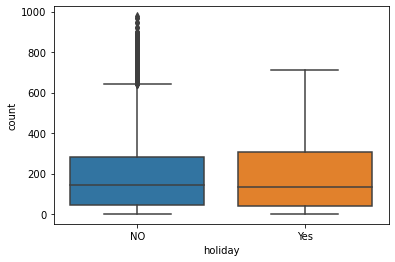

In [23]:
sns.boxplot(x = new_df["holiday"],y=df["count"])

In [24]:
new_df.groupby("holiday")["count"].sum()

holiday
NO     2027668
Yes      57808
Name: count, dtype: int64

In [25]:
new_df.groupby("holiday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
NO,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
Yes,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [26]:
new_df.groupby("holiday")["count"].mean()

holiday
NO     191.741655
Yes    185.877814
Name: count, dtype: float64

We see the avegage number of electric cycles rented on weekdays is more when compared to those on holidays.We have to confirm this using Hypothesys testing.

As this we are using Numerical vs categorical feature with two  categories we can use **2 sample T-test**
- we check for 5% significance,10% significance
- we assumen the data is independent
- we assume the samples are random.

checcking if data is normal

In [27]:
holiday = df[new_df["holiday"] == "Yes"]["count"]

nonholiday = df[new_df["holiday"] == "NO"]["count"]


In [28]:
sample_size_holi = 30
iterations = 1000
sample_size_non = 1000


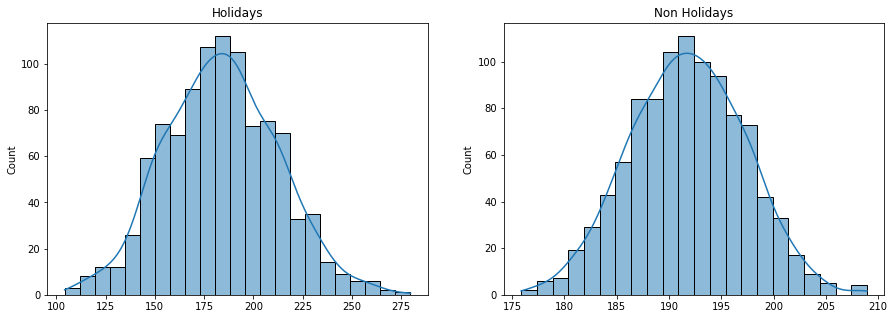

In [29]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
list_of_holiday_means = [holiday.sample(sample_size_holi).mean() for i in range(iterations)]
axes[0].set_title("Holidays")
sns.histplot(list_of_holiday_means,kde=True,ax=axes[0])

list_of_non_holiday_means = [nonholiday.sample(sample_size_non).mean() for i in range(iterations)]
axes[1].set_title("Non Holidays")
sns.histplot(list_of_non_holiday_means,kde=True,ax=axes[1])
plt.show()

We see distribution looks normal.But we have to use qqplots and shapiro to test for gaussian. Not required at this moment. We can see that when we do ANOVA.

Test Statistic: Average number of rentals. μ<br>
**Step 1**: defining Null Hypothesis and alternate Hypothesis<br>
μ1 is mean on Non holidays<br>
μ2 is mean on holidays

**H0**: μ1 = μ2 <br>
**Ha**: μ1 ≠  μ2 <br>

In [30]:
BOLD = '\033[1m'
END = '\033[0m'
t_statistic,p_val = ttest_ind(nonholiday,holiday)
print(f"T Statistic: {t_statistic}\nP Value: {p_val}")
def func(alpha):
    print("-"*50)
    print(BOLD+f"For {alpha}% significance"+END)
    if p_val < alpha :
        print("Reject null hypothesis")
        print("μ1 ≠  μ2")
    else:
        print("Failed to reject H0")
        print("The Difference between μ1 and μ2 is stastically Insgnificant")
    print("-"*50)
for i in [0.05,0.1]:
    func(i)

T Statistic: 0.5626388963477119
P Value: 0.5736923883271103
--------------------------------------------------
For 0.05% significance
Failed to reject H0
The Difference between μ1 and μ2 is stastically Insgnificant
--------------------------------------------------
--------------------------------------------------
For 0.1% significance
Failed to reject H0
The Difference between μ1 and μ2 is stastically Insgnificant
--------------------------------------------------


Conclusion: Holiday does not seem to effect the business.

## Working Day has an effect on count?

In [31]:
new_df.drop(columns=["workingday"],inplace=True)

In [32]:
new_df.rename(columns={"workingDay":"workingday"},inplace = True)

In [33]:
new_df["workingday"].value_counts()

WorkingDay       7412
NonWorkingDay    3474
Name: workingday, dtype: int64

In [34]:
new_df.groupby(["workingday"])["count"].mean()

workingday
NonWorkingDay    188.506621
WorkingDay       193.011873
Name: count, dtype: float64

We see the avegage number of electric cycles rented on working day is more when compared to those on non working day.We have to confirm this using Hypothesys testing.

In [35]:
workingDay = df[new_df["workingday"] == "WorkingDay"]["count"]

nonworkingDay = df[new_df["workingday"] == "NonWorkingDay"]["count"]



In [36]:
sample_size_working = 700
iterations = 1000
sample_size_nonworking = 300


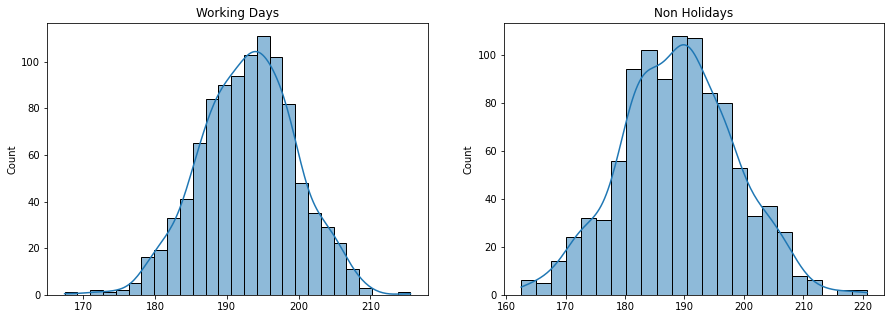

In [37]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
list_of_workingday_means = [workingDay.sample(sample_size_working).mean() for i in range(iterations)]
axes[0].set_title("Working Days")
sns.histplot(list_of_workingday_means,kde=True,ax=axes[0])

list_of_non_workingday_means = [nonworkingDay.sample(sample_size_nonworking).mean() for i in range(iterations)]
axes[1].set_title("Non Holidays")
sns.histplot(list_of_non_workingday_means,kde=True,ax=axes[1])
plt.show()

Test Statistic: Average number of rentals. μ <br>
Step 1: defining Null Hypothesis and alternate Hypothesis <br>
μ1 is mean on Non Working Days<br>
μ2 is mean on Working Days<br>

H0: μ1 = μ2<br>
Ha: μ1 ≠ μ2<br>

In [38]:
BOLD = '\033[1m'
END = '\033[0m'
t_statistic,p_val = ttest_ind(nonworkingDay,workingDay)
print(f"T Statistic: {t_statistic}\nP Value: {p_val}")
def func(alpha):
    print("-"*50)
    print(BOLD+f"For {alpha}% significance"+END)
    if p_val < alpha :
        print("Reject null hypothesis")
        print("μ1 ≠  μ2")
    else:
        print("Failed to reject H0")
        print("The Difference between μ1 and μ2 is stastically Insgnificant")
    print("-"*50)
for i in [0.05,0.1]:
    func(i)

T Statistic: -1.2096277376026694
P Value: 0.22644804226361348
--------------------------------------------------
For 0.05% significance
Failed to reject H0
The Difference between μ1 and μ2 is stastically Insgnificant
--------------------------------------------------
--------------------------------------------------
For 0.1% significance
Failed to reject H0
The Difference between μ1 and μ2 is stastically Insgnificant
--------------------------------------------------


Conclusion: Working day doesnot have a significant effect on the business.

## No. of cycles rented similar or different in different seasons


<AxesSubplot:xlabel='season', ylabel='count'>

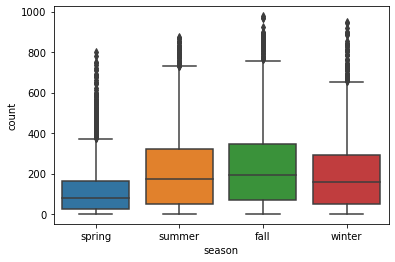

In [39]:
sns.boxplot(x = new_df["season"],y=df["count"])

In [40]:
new_df.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [41]:
new_df.groupby("season")["count"].mean()

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

#### ANOVA is required to check for significance

In [42]:
fall = new_df[new_df["season"]=="fall"]["count"]
spring = new_df[new_df["season"]=="spring"]["count"]
summer = new_df[new_df["season"]=="summer"]["count"]
winter = new_df[new_df["season"]=="winter"]["count"]

**Test if assumptions of ANOVA holds true**

1. We assume the data collected are independent.

2. Test for Gaussian<br>
    a. QQ-plot

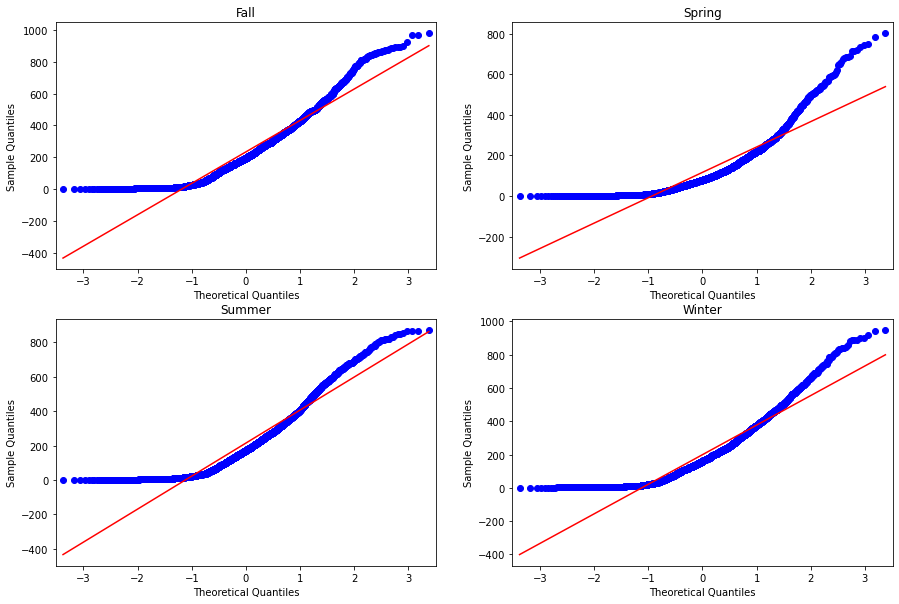

In [43]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
qqplot(fall,line="s",ax = axs[0,0])
axs[0,0].set_title("Fall")
qqplot(spring,line="s",ax = axs[0,1])
axs[0,1].set_title("Spring")
qqplot(summer,line="s",ax = axs[1,0])
axs[1,0].set_title("Summer")
qqplot(winter,line="s",ax = axs[1,1])
axs[1,1].set_title("Winter")
plt.show()

    b. Shapiro test for Gaussian

H0: Data is Gaussian <br>
Ha: Data is not Gaussian <br>
Lets test for 5% significance

In [44]:
alpha = 0.05
y = new_df["season"].unique()
y.sort()
def func(x):
    j=0
    for i in x:
        
        test_stat, p_value = shapiro(i.head(100))
        print(("-"*20)+str(y[j].capitalize())+("-"*20))
        if p_value < alpha:
            print("Reject Null Hypothesys")
            print("Data is Not Gaussian")
        else:
            print("Failed to reject Null Hypothesis")
            print("Data is Gaussian")
        print("-"*50)
        j+=1

x = [fall,spring,summer,winter]
func(x)

--------------------Fall--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------
--------------------Spring--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------
--------------------Summer--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------
--------------------Winter--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------


**Conclusion:** The data is not Gaussian

3. Test for Equal Varience<br>
Levene<br>
H0: Variances are equal<br>
Ha: Variances are not equal

In [45]:
levene_stat, p_value = levene(fall,spring,summer,winter)
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("Variances are not equal")
else:
    print("Failed to reject Null Hypothesis")
    

Reject Null Hypothesis
Variances are not equal


**The Assumptions of ANOVA doesnot hold true.However we will perform ANOVA but we will also do Kruskal Wallis test.**

In [46]:
print("Fall: ",fall.mean())

Fall:  234.417124039517


In [47]:
print("Spring: ",spring.mean())

Spring:  116.34326135517499


In [48]:
print("Summer: ",summer.mean())

Summer:  215.25137211855105


In [49]:
print("Winter: ",winter.mean())

Winter:  198.98829553767374


H0: All groups have same mean<br>
Ha: One or more groups have different mean

In [50]:
f_ratio,p_value = f_oneway(fall,spring,summer,winter)
alpha = 0.05
if p_value<alpha:
    print("Reject Null Hypothesis\nOne or more groups have different mean")
else:
    print("Failed to Reject Null Hypothesis\nAll groups have same mean")

Reject Null Hypothesis
One or more groups have different mean


We also need to do kruskal's test as the assumptions of ANOVA were false.

In [51]:
f_ratio,p_value = kruskal(fall,spring,summer,winter)
alpha = 0.05
if p_value<alpha:
    print("Reject Null Hypothesis\nOne or more groups have different mean")
else:
    print("Failed to Reject Null Hypothesis\nAll groups have same mean")

Reject Null Hypothesis
One or more groups have different mean


Kruskal yielded similar results as ANOVA

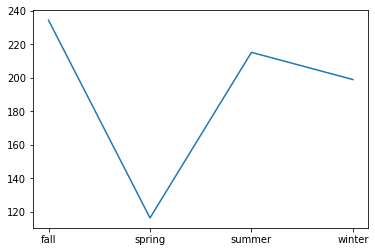

In [52]:
x = new_df.groupby(["season"])["count"].mean().index
y = new_df.groupby(["season"])["count"].mean()
plt.plot(x,y)
plt.show()

The average number of rentals during fall is High and there is a clear dip in number durinf spring season. During Summer and winter we see a rise in number but their difference doesnot seem to be high. We can do 2 sampled ttest for these seasons to find the significance. But comparing to the spring season the other 3 have a higher number.

### No. of cycles rented similar or different in different weather


In [53]:
new_df.groupby(["weather"])["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

In [54]:
one = new_df[new_df["weather"]==1]["count"]
two = new_df[new_df["weather"]==2]["count"]
three = new_df[new_df["weather"]==3]["count"]
four = new_df[new_df["weather"]==4]["count"]

<AxesSubplot:xlabel='weather', ylabel='count'>

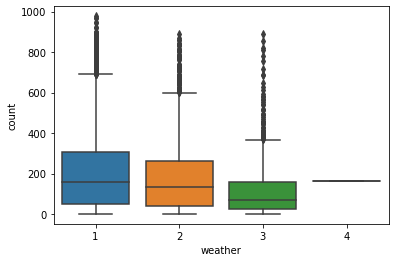

In [55]:
sns.boxplot(x = new_df["weather"],y=new_df["count"])

**Test if assumptions of ANOVA holds true**

1. We assume the data collected are independent.

2. Test for Gaussian<br>
    a. QQ-plot

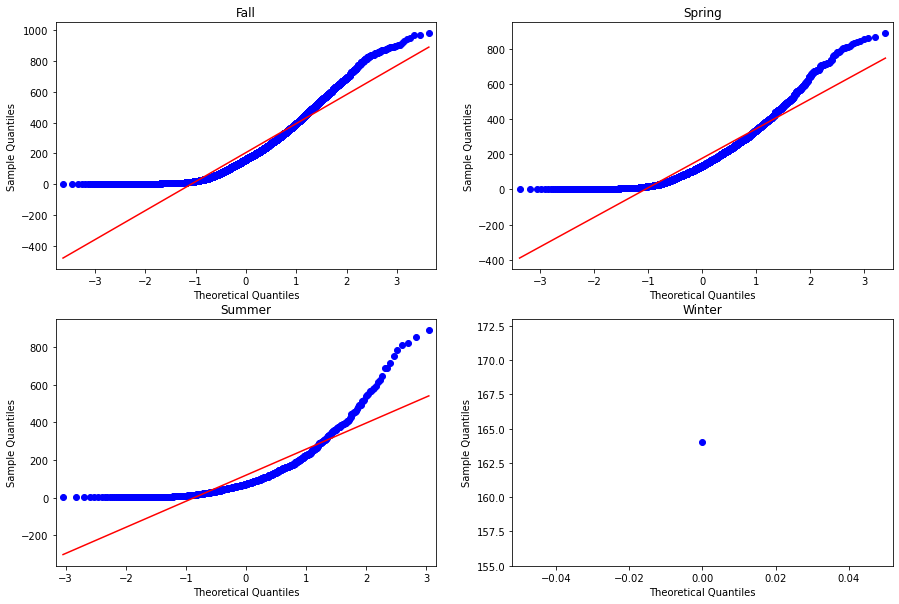

In [56]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
qqplot(one,line="s",ax = axs[0,0])
axs[0,0].set_title("Fall")
qqplot(two,line="s",ax = axs[0,1])
axs[0,1].set_title("Spring")
qqplot(three,line="s",ax = axs[1,0])
axs[1,0].set_title("Summer")
qqplot(four,line="s",ax = axs[1,1])
axs[1,1].set_title("Winter")
plt.show()

We can drop the season number 4 as it has only one data point

    b. Shapiro test for Gaussian

H0: Data is Gaussian <br>
Ha: Data is not Gaussian <br>
Lets test for 5% significance

In [57]:
alpha = 0.05
y = new_df["weather"].unique()
y.sort()
def func(x):
    j=0
    for i in x:
        
        test_stat, p_value = shapiro(i.head(100))
        print(("-"*20)+str(y[j])+("-"*20))
        if p_value < alpha:
            print("Reject Null Hypothesys")
            print("Data is Not Gaussian")
        else:
            print("Failed to reject Null Hypothesis")
            print("Data is Gaussian")
        print("-"*50)
        j+=1

x = [one,two,three]
func(x)

--------------------1--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------
--------------------2--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------
--------------------3--------------------
Reject Null Hypothesys
Data is Not Gaussian
--------------------------------------------------


**Conclusion:** The data is not Gaussian
3. Test for Equal Varience<br>
Levene<br>
H0: Variances are equal<br>
Ha: Variances are not equal

In [58]:
levene_stat, p_value = levene(one,two,three)
if p_value < 0.05:
    print("Reject Null Hypothesis")
    print("Variances are not equal")
else:
    print("Failed to reject Null Hypothesis")
    

Reject Null Hypothesis
Variances are not equal


The Assumptions of ANOVA doesnot hold true.However we will perform ANOVA but we will also do Kruskal Wallis test.

H0: All groups have same mean<br>
Ha: One or more groups have different mean

In [59]:
f_ratio,p_value = f_oneway(one,two,three)
alpha = 0.05
if p_value<alpha:
    print("Reject Null Hypothesis\nOne or more groups have different mean")
else:
    print("Failed to Reject Null Hypothesis\nAll groups have same mean")

Reject Null Hypothesis
One or more groups have different mean


In [60]:
one.mean()

205.23679087875416

In [61]:
two.mean()

178.95553987297106

In [62]:
three.mean()

118.84633294528521

We also need to do kruskal's test as the assumptions of ANOVA were false.

In [63]:
f_ratio,p_value = kruskal(one,two,three)
alpha = 0.05
if p_value<alpha:
    print("Reject Null Hypothesis\nOne or more groups have different mean")
else:
    print("Failed to Reject Null Hypothesis\nAll groups have same mean")

Reject Null Hypothesis
One or more groups have different mean


Kruskal yielded similar results as ANOVA

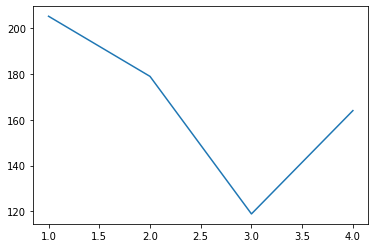

In [64]:
x = new_df.groupby(["weather"])["count"].mean().index
y = new_df.groupby(["weather"])["count"].mean()
plt.plot(x,y)
plt.show()

In weather type 1 the business is at it's peak but it starts gradually reducing from type 2 to 3 and again raises to not much significance during weather type 4. So, weather has an impact on business.

<AxesSubplot:xlabel='weather', ylabel='count'>

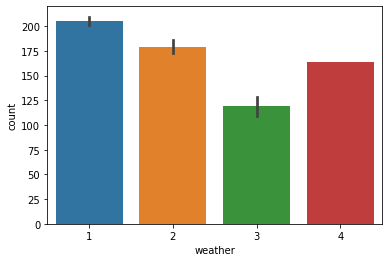

In [65]:
sns.barplot(data=new_df,x=new_df["weather"],y=new_df["count"])

## Weather is dependent on season

H0:Weather and season are independent<br>
Ha:Weather is dependent on season

In [66]:
weather_vs_season=pd.crosstab(index = new_df["weather"],columns=new_df["season"],values=new_df["count"],aggfunc="mean").fillna(0)

In [67]:
chi_stat, p_value, df, exp_values = chi2_contingency(weather_vs_season)

In [68]:
alp = 0.05
if p_value < alp:
    print("Reject Null Hypothesis")
    print("Weather is dependent on season")
else:
    print("Failed to reject Null Hypothesis")
    print("Weather and season are independent")

Reject Null Hypothesis
Weather is dependent on season


In [69]:
weather_vs_season # heatmap required

season,fall,spring,summer,winter
weather,,,,
1,243.583420,126.781694,236.729595,209.511163
2,230.771523,106.861538,189.515537,194.784387
3,156.582915,61.227488,123.906250,134.466667
4,0.000000,164.000000,0.000000,0.000000


In [70]:
l = list(d.values())

In [71]:
l

['Clear, Few clouds, partly cloudy, partly cloudy',
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']

<AxesSubplot:xlabel='season', ylabel='weather'>

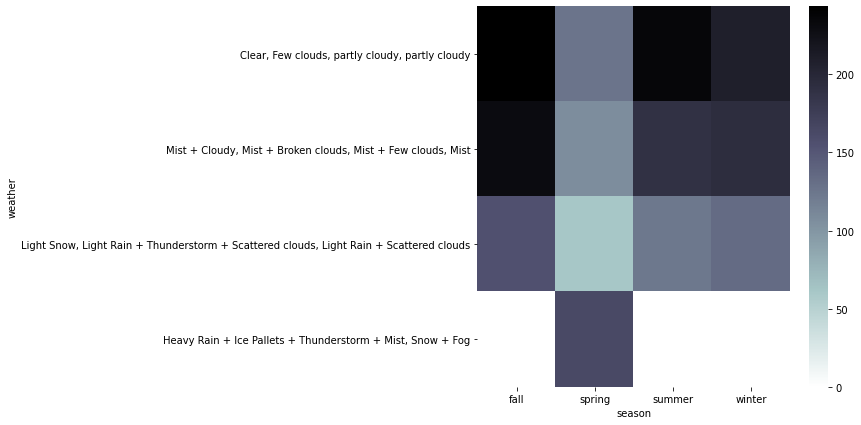

In [72]:
plt.figure(figsize=(7,7))
sns.heatmap(weather_vs_season,cmap="bone_r",yticklabels=l)

Heatmap shows the dependency of weather vs season on number of rentals. Darker regions have higher number of rentals.

### Insights

- Holiday and working day have no significant impact on business.
- Weather seem to effect the business.
- Season also seem to effect the business.
- We also found out that weather and season combined has an impact on business.(represented as heatmap)

## Recommendations

- Whenever there is a weather condition(spring) that is effecting business, we can move the business to an alternate geography where the weather is in the other categories(summer,winter,fall).
- Same goes for season. Move to a nearby location(type 1,2 or 4) where there is a minimal impact of season on business.
- 'Clear, Few clouds, partly cloudy, partly cloudy' weather + fall season,  'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' weather + fall have higher number of rentals. So when there is a  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' weather combined with fall, summer or winter, it is better to move the business to other locations.